<a href="https://colab.research.google.com/github/Derun-Chai/Assignment3/blob/https%2Fgithub.com%2FAlocinYerv%2FTulip.git/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** Derun Chai

**Description:**

This notebook demonstrates the future price prediction for different stocks using recurrent neural networks in tensorflow. Recurrent neural networks with basic, LSTM or GRU cells are implemented.

**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Analyze data](#2-bullet)
3. [Manipulate data](#3-bullet)
4. [Model and validate data](#4-bullet)
5. [Predictions](#5-bullet)

**Reference:**  

[LSTM_Stock_prediction-20170507 by BenF](https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507/notebook)

# 1. Libraries and settings <a class="anchor" id="1-bullet"></a>

In [2]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [3]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
tf.compat.v1.enable_eager_execution()


# split data in 40%/20%/20% train/validation/test sets
valid_set_size_percentage = 20
test_set_size_percentage = 20

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));


2.15.0
/: ['mnt', 'dev', 'libx32', 'proc', 'usr', 'lib32', 'srv', 'sys', 'boot', 'tmp', 'lib64', 'sbin', 'run', 'home', 'opt', 'lib', 'media', 'etc', 'var', 'root', 'bin', 'content', '.dockerenv', 'tools', 'datalab', 'python-apt', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.0-1_all.deb']
/content: ['.config', 'prices-split-adjusted.csv', 'sample_data']


# 2. Analyze data <a class="anchor" id="2-bullet"></a>
- load stock prices from prices-split-adjusted.csv
- analyze data

In [4]:
# import all stock prices
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

number of different stocks:  501
['DUK', 'LLY', 'TEL', 'FLR', 'AET', 'SHW', 'LNC', 'UAA', 'HRB', 'CLX']


In [5]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [6]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


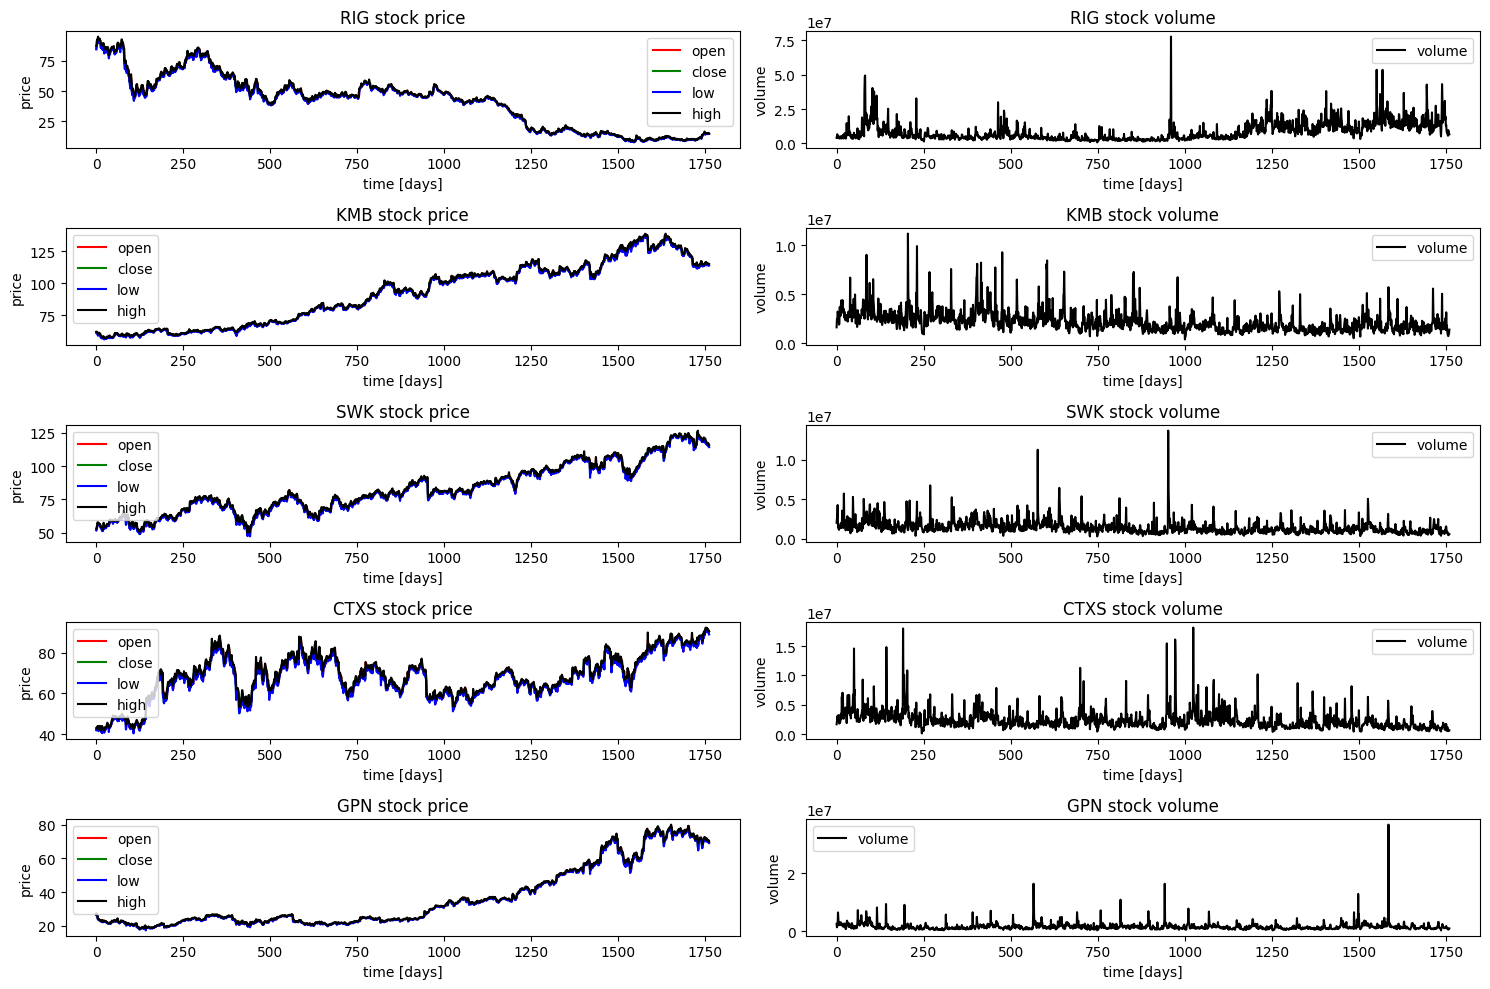

In [8]:
plt.figure(figsize=(15, 10))

# List of stocks to plot
stocks = ['RIG', 'KMB', 'SWK', 'CTXS', 'GPN']

# Plotting price data for each stock
for i, stock in enumerate(stocks, 1):
    plt.subplot(5, 2, 2*i-1)  # 5 rows, 2 columns, ith plot
    plt.plot(df[df.symbol == stock].open.values, color='red', label='open')
    plt.plot(df[df.symbol == stock].close.values, color='green', label='close')
    plt.plot(df[df.symbol == stock].low.values, color='blue', label='low')
    plt.plot(df[df.symbol == stock].high.values, color='black', label='high')
    plt.title(f'{stock} stock price')
    plt.xlabel('time [days]')
    plt.ylabel('price')
    plt.legend(loc='best')

# Plotting volume data for each stock
for i, stock in enumerate(stocks, 1):
    plt.subplot(5, 2, 2*i)  # 5 rows, 2 columns, ith plot
    plt.plot(df[df.symbol == stock].volume.values, color='black', label='volume')
    plt.title(f'{stock} stock volume')
    plt.xlabel('time [days]')
    plt.ylabel('volume')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

# 3. Manipulate data <a class="anchor" id="3-bullet"></a>
- choose a specific stock
- drop feature: volume
- normalize stock data
- create train, validation and test data sets

<ipython-input-9-18305853bea4>:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_stock.drop(['symbol'], 1, inplace=True)


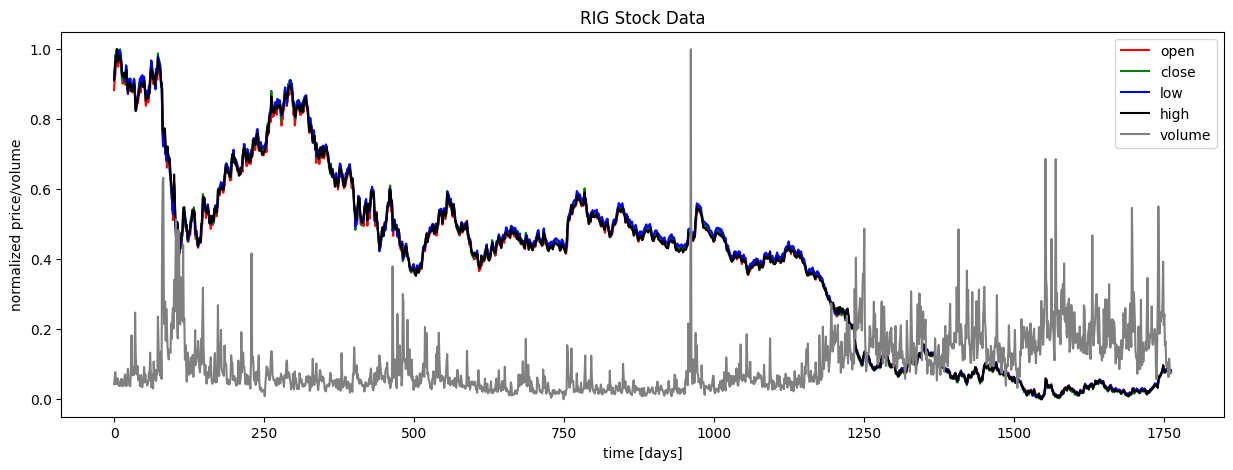

<ipython-input-9-18305853bea4>:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_stock.drop(['symbol'], 1, inplace=True)


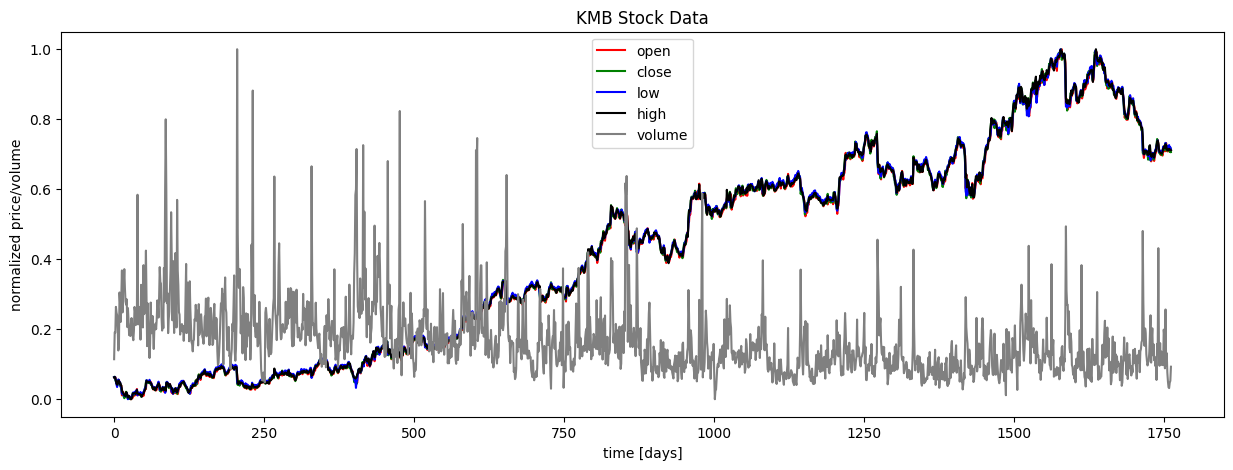

<ipython-input-9-18305853bea4>:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_stock.drop(['symbol'], 1, inplace=True)


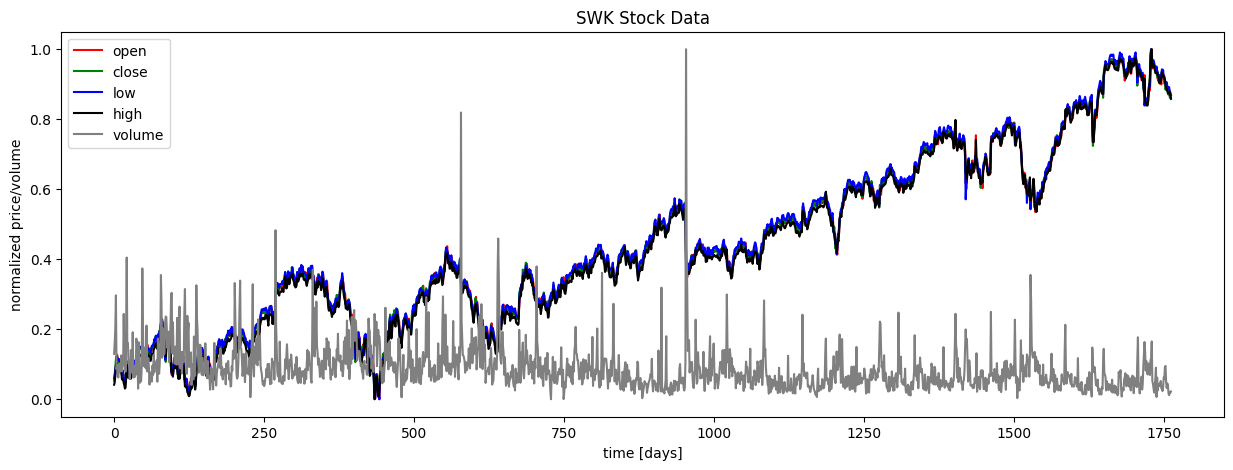

<ipython-input-9-18305853bea4>:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_stock.drop(['symbol'], 1, inplace=True)


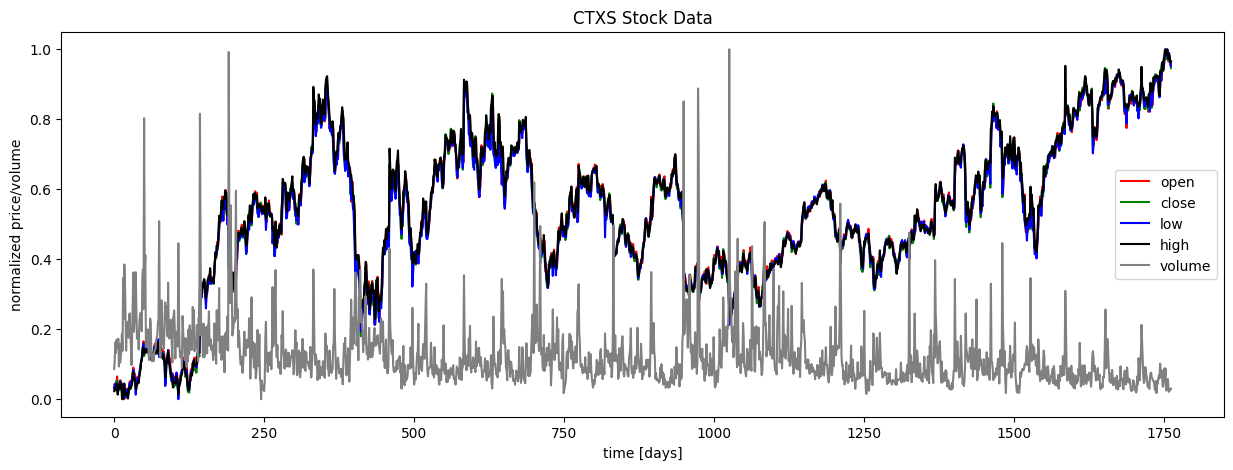

<ipython-input-9-18305853bea4>:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_stock.drop(['symbol'], 1, inplace=True)


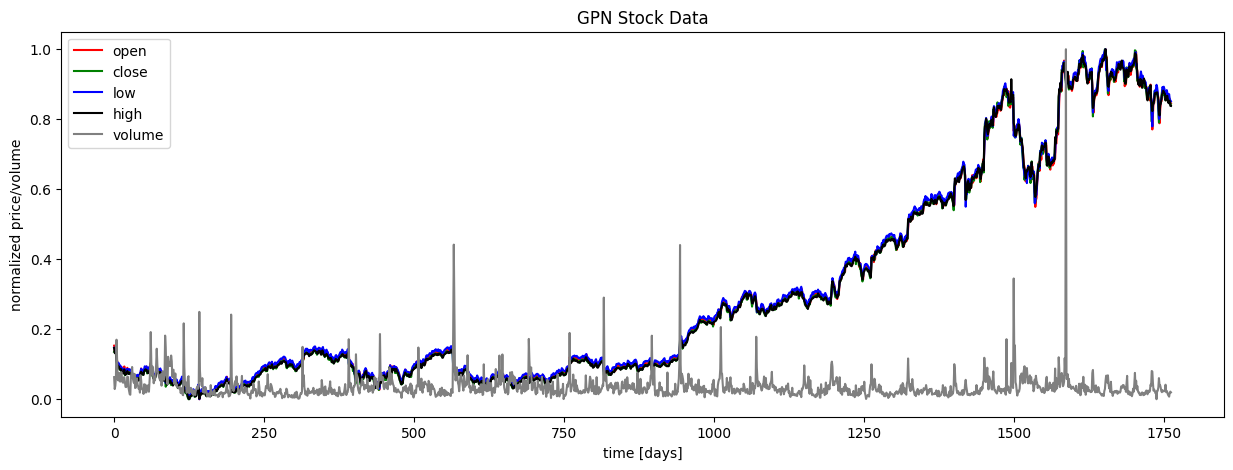

x_train.shape =  (3485, 19, 5)
y_train.shape =  (3485, 5)
x_valid.shape =  (1740, 19, 5)
y_valid.shape =  (1740, 5)
x_test.shape =  (3485, 19, 5)
y_test.shape =  (3485, 5)


In [9]:
import numpy as np
import sklearn.preprocessing

# Function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    if 'volume' in df.columns:
        df['volume'] = min_max_scaler.fit_transform(df['volume'].values.reshape(-1,1))
    return df

# Function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len, train_size_percentage, valid_size_percentage, test_size_percentage):
    data_raw = stock.values # convert to numpy array
    data = []

    # Create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index + seq_len])

    data = np.array(data)
    train_set_size = int(np.round(train_size_percentage/100*data.shape[0]))
    valid_set_size = int(np.round(valid_size_percentage/100*data.shape[0]))
    test_set_size = data.shape[0] - train_set_size - valid_set_size

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]

    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]

    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# List of stocks to include
stocks = ['RIG', 'KMB', 'SWK', 'CTXS', 'GPN']

# Initialize empty arrays for concatenating data
x_trains, y_trains, x_valids, y_valids, x_tests, y_tests = [], [], [], [], [], []

seq_len = 20 # Choose sequence length

# Loop through each stock
for stock in stocks:
    df_stock = df[df.symbol == stock].copy()
    df_stock.drop(['symbol'], 1, inplace=True)

    # Normalize stock data
    df_stock_norm = normalize_data(df_stock.copy())


    # Create train, test, validation data
    x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len, 40, 20, 40)

    # Append the data
    x_trains.append(x_train)
    y_trains.append(y_train)
    x_valids.append(x_valid)
    y_valids.append(y_valid)
    x_tests.append(x_test)
    y_tests.append(y_test)
    # Plotting
    plt.figure(figsize=(15, 5))
    plt.plot(df_stock_norm.open.values, color='red', label='open')
    plt.plot(df_stock_norm.close.values, color='green', label='close')
    plt.plot(df_stock_norm.low.values, color='blue', label='low')
    plt.plot(df_stock_norm.high.values, color='black', label='high')
    plt.plot(df_stock_norm.volume.values, color='gray', label='volume')

    plt.title(f'{stock} Stock Data')
    plt.xlabel('time [days]')
    plt.ylabel('normalized price/volume')
    plt.legend(loc='best')
    plt.show()

# Concatenate the data from all stocks
x_train = np.concatenate(x_trains, axis=0)
y_train = np.concatenate(y_trains, axis=0)
x_valid = np.concatenate(x_valids, axis=0)
y_valid = np.concatenate(y_valids, axis=0)
x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ', x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)


# 4. Model and validate data <a class="anchor" id="4-bullet"></a>
- RNNs with basic, LSTM, GRU cells


Processing stock: RIG
Epoch 1/70
7/7 [==============================] - 4s 232ms/step - loss: 3.0596 - val_loss: 2.7277
Epoch 2/70
7/7 [==============================] - 1s 111ms/step - loss: 2.4268 - val_loss: 0.4458
Epoch 3/70
7/7 [==============================] - 1s 98ms/step - loss: 0.8265 - val_loss: 1.2092
Epoch 4/70
7/7 [==============================] - 1s 99ms/step - loss: 0.8848 - val_loss: 0.3806
Epoch 5/70
7/7 [==============================] - 1s 97ms/step - loss: 1.0685 - val_loss: 1.4534
Epoch 6/70
7/7 [==============================] - 1s 98ms/step - loss: 0.7775 - val_loss: 0.3139
Epoch 7/70
7/7 [==============================] - 1s 97ms/step - loss: 0.6865 - val_loss: 1.0623
Epoch 8/70
7/7 [==============================] - 1s 96ms/step - loss: 1.0083 - val_loss: 0.0982
Epoch 9/70
7/7 [==============================] - 1s 99ms/step - loss: 0.0231 - val_loss: 0.0273
Epoch 10/70
7/7 [==============================] - 1s 97ms/step - loss: 0.0156 - val_loss: 0.0076
Epoch

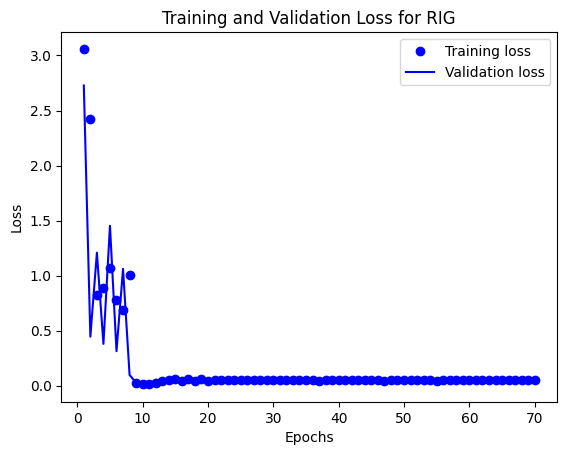

Processing stock: KMB
Epoch 1/70
7/7 [==============================] - 2s 144ms/step - loss: 3.6888 - val_loss: 1.1311
Epoch 2/70
7/7 [==============================] - 1s 98ms/step - loss: 0.6611 - val_loss: 0.0015
Epoch 3/70
7/7 [==============================] - 1s 96ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 4/70
7/7 [==============================] - 1s 189ms/step - loss: 0.0817 - val_loss: 0.1692
Epoch 5/70
7/7 [==============================] - 1s 99ms/step - loss: 0.0578 - val_loss: 0.0494
Epoch 6/70
7/7 [==============================] - 1s 101ms/step - loss: 0.0456 - val_loss: 0.0184
Epoch 7/70
7/7 [==============================] - 1s 130ms/step - loss: 0.0549 - val_loss: 0.1193
Epoch 8/70
7/7 [==============================] - 1s 165ms/step - loss: 0.0558 - val_loss: 0.0373
Epoch 9/70
7/7 [==============================] - 1s 166ms/step - loss: 0.0649 - val_loss: 0.0819
Epoch 10/70
7/7 [==============================] - 1s 162ms/step - loss: 0.0549 - val_loss: 0.0179


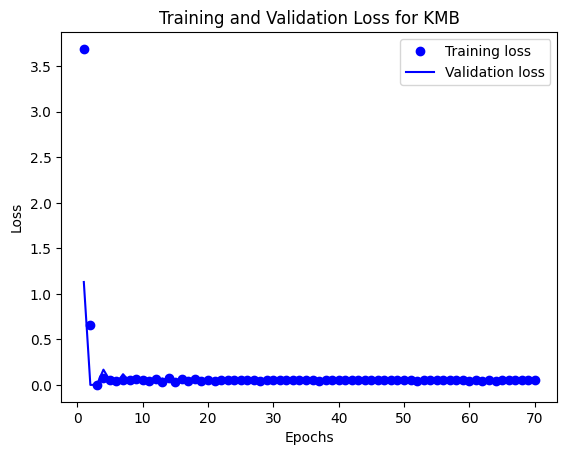

Processing stock: SWK
Epoch 1/70
7/7 [==============================] - 4s 225ms/step - loss: 3.8389 - val_loss: 1.9193
Epoch 2/70
7/7 [==============================] - 1s 162ms/step - loss: 1.4161 - val_loss: 0.0365
Epoch 3/70
7/7 [==============================] - 1s 166ms/step - loss: 0.0083 - val_loss: 0.0020
Epoch 4/70
7/7 [==============================] - 1s 164ms/step - loss: 0.0270 - val_loss: 0.1203
Epoch 5/70
7/7 [==============================] - 1s 114ms/step - loss: 0.0726 - val_loss: 0.0766
Epoch 6/70
7/7 [==============================] - 1s 100ms/step - loss: 0.0403 - val_loss: 0.0436
Epoch 7/70
7/7 [==============================] - 1s 98ms/step - loss: 0.0861 - val_loss: 0.0451
Epoch 8/70
7/7 [==============================] - 1s 101ms/step - loss: 0.0442 - val_loss: 0.0385
Epoch 9/70
7/7 [==============================] - 1s 99ms/step - loss: 0.0395 - val_loss: 0.1522
Epoch 10/70
7/7 [==============================] - 1s 97ms/step - loss: 0.0777 - val_loss: 0.0282


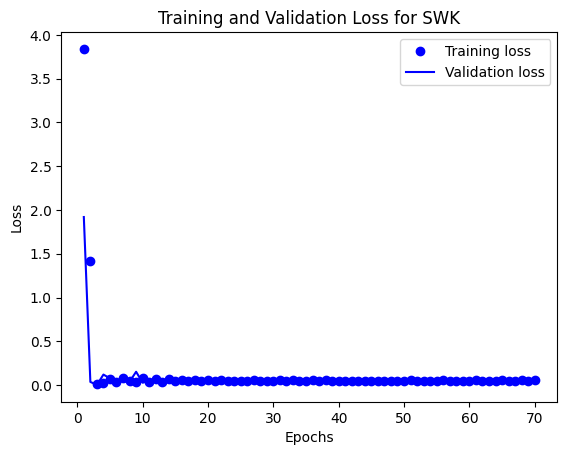

Processing stock: CTXS
Epoch 1/70
7/7 [==============================] - 3s 229ms/step - loss: 3.7751 - val_loss: 2.2800
Epoch 2/70
7/7 [==============================] - 1s 165ms/step - loss: 0.6528 - val_loss: 0.2468
Epoch 3/70
7/7 [==============================] - 1s 185ms/step - loss: 0.8955 - val_loss: 0.5774
Epoch 4/70
7/7 [==============================] - 1s 169ms/step - loss: 1.2188 - val_loss: 0.9384
Epoch 5/70
7/7 [==============================] - 1s 160ms/step - loss: 1.2880 - val_loss: 1.7275
Epoch 6/70
7/7 [==============================] - 1s 157ms/step - loss: 0.7062 - val_loss: 1.1798
Epoch 7/70
7/7 [==============================] - 1s 102ms/step - loss: 0.5920 - val_loss: 0.5760
Epoch 8/70
7/7 [==============================] - 1s 95ms/step - loss: 1.4876 - val_loss: 0.9924
Epoch 9/70
7/7 [==============================] - 1s 98ms/step - loss: 0.9572 - val_loss: 1.1364
Epoch 10/70
7/7 [==============================] - 1s 103ms/step - loss: 1.0346 - val_loss: 0.040

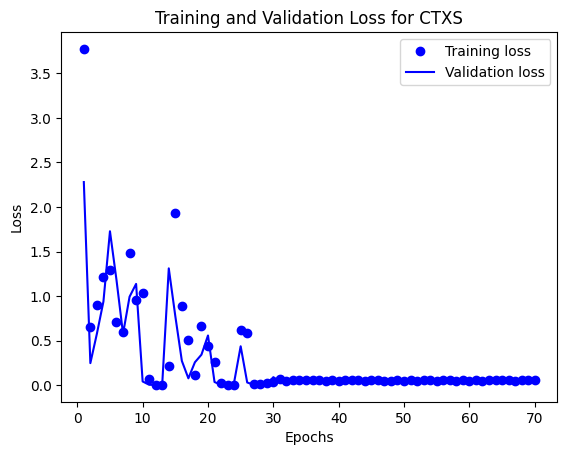

Processing stock: GPN
Epoch 1/70
7/7 [==============================] - 3s 198ms/step - loss: 2.2047 - val_loss: 3.6834
Epoch 2/70
7/7 [==============================] - 1s 161ms/step - loss: 1.2167 - val_loss: 0.2412
Epoch 3/70
7/7 [==============================] - 1s 165ms/step - loss: 0.1479 - val_loss: 0.0188
Epoch 4/70
7/7 [==============================] - 1s 162ms/step - loss: 0.0099 - val_loss: 0.0128
Epoch 5/70
7/7 [==============================] - 1s 152ms/step - loss: 0.0315 - val_loss: 0.0430
Epoch 6/70
7/7 [==============================] - 1s 168ms/step - loss: 0.0327 - val_loss: 0.0231
Epoch 7/70
7/7 [==============================] - 1s 167ms/step - loss: 0.0397 - val_loss: 0.0640
Epoch 8/70
7/7 [==============================] - 1s 153ms/step - loss: 0.0689 - val_loss: 0.0245
Epoch 9/70
7/7 [==============================] - 1s 100ms/step - loss: 0.0449 - val_loss: 0.0568
Epoch 10/70
7/7 [==============================] - 1s 100ms/step - loss: 0.0563 - val_loss: 0.05

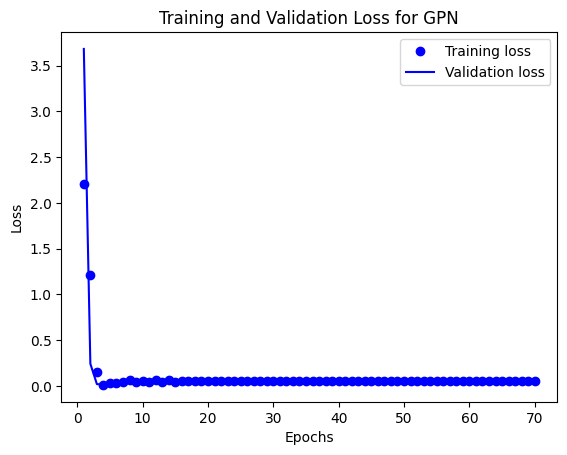

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
n_steps = 19  # Assuming 19 time steps; adjust as needed
n_inputs = 4  # Number of features
n_neurons = 300
n_outputs = 5  # Adjusted for 5 target features
n_layers = 2
learning_rate = 0.0015
batch_size = 100
n_epochs = 70

stocks = ['RIG', 'KMB', 'SWK', 'CTXS', 'GPN']
window_size = 5

for stock in stocks:
    print(f"Processing stock: {stock}")

    # Prepare data for the current stock
    df_stock = df[df.symbol == stock].copy()
    df_stock.drop(['symbol'], axis=1, inplace=True)
    df_stock_norm = normalize_data(df_stock)

    # Create train, validation, test data
    x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, n_steps, 40, 20, 40)

    # Calculate moving averages and residuals
    y_train_ma = calculate_moving_average(y_train, window_size)
    y_valid_ma = calculate_moving_average(y_valid, window_size)
    y_test_ma = calculate_moving_average(y_test, window_size)

    y_train_adjusted = y_train[window_size-1:]
    y_valid_adjusted = y_valid[window_size-1:]
    y_test_adjusted = y_test[window_size-1:]

    y_train_residual = y_train_adjusted - y_train_ma
    y_valid_residual = y_valid_adjusted - y_valid_ma
    y_test_residual = y_test_adjusted - y_test_ma

    x_train_adjusted = x_train[-y_train_residual.shape[0]:, :, :]
    x_valid_adjusted = x_valid[-y_valid_residual.shape[0]:, :, :]
    x_test_adjusted = x_test[-y_test_residual.shape[0]:, :, :]

    # Build the RNN model
    model = tf.keras.Sequential()
    for i in range(n_layers):
        if i == n_layers - 1:
            model.add(tf.keras.layers.SimpleRNN(n_neurons, return_sequences=False))
        else:
            model.add(tf.keras.layers.SimpleRNN(n_neurons, return_sequences=True))
    model.add(tf.keras.layers.Dense(n_outputs))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate), loss='mean_squared_error')

    # Train the model
    history = model.fit(x_train_adjusted, y_train_residual, epochs=n_epochs, batch_size=batch_size, validation_data=(x_valid_adjusted, y_valid_residual))

    # Predictions
    y_train_pred_residual = model.predict(x_train_adjusted)
    y_valid_pred_residual = model.predict(x_valid_adjusted)
    y_test_pred_residual = model.predict(x_test_adjusted)

    # Final predictions (basic model prediction + predicted residual)
    y_train_final_pred = y_train_ma + y_train_pred_residual[:y_train_ma.shape[0], :]
    y_valid_final_pred = y_valid_ma + y_valid_pred_residual[:y_valid_ma.shape[0], :]
    y_test_final_pred = y_test_ma + y_test_pred_residual[:y_test_ma.shape[0], :]

    # Extract and plot the history of loss and validation loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# Build the ARIMA model


Analyzing Stock: RIG


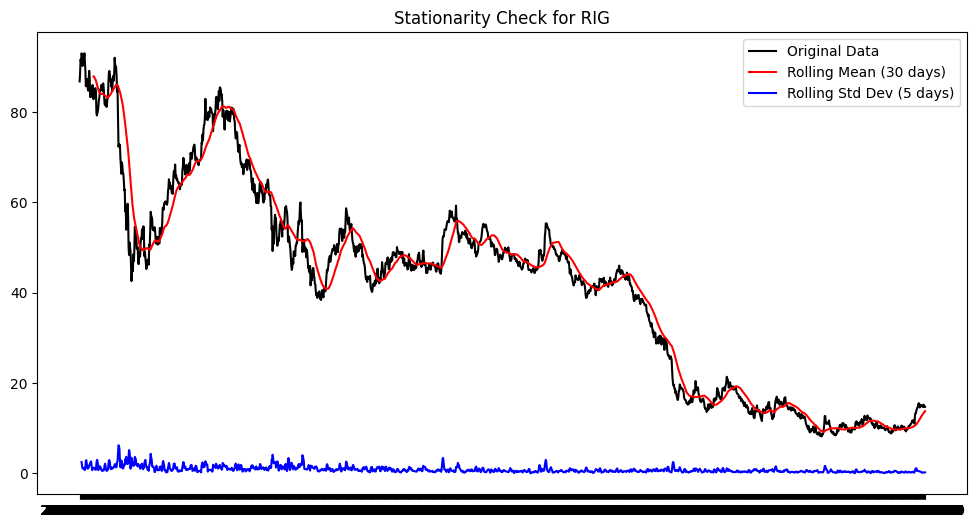

Dickey-Fuller Test: Stationarity Check for RIG

Test Statistic                   -1.705908
p-value                           0.428071
#Lags Used                       18.000000
Number of Observations Used    1743.000000
dtype: float64
Critical value at 1%: -3.43411
Critical value at 5%: -2.86320
Critical value at 10%: -2.56765


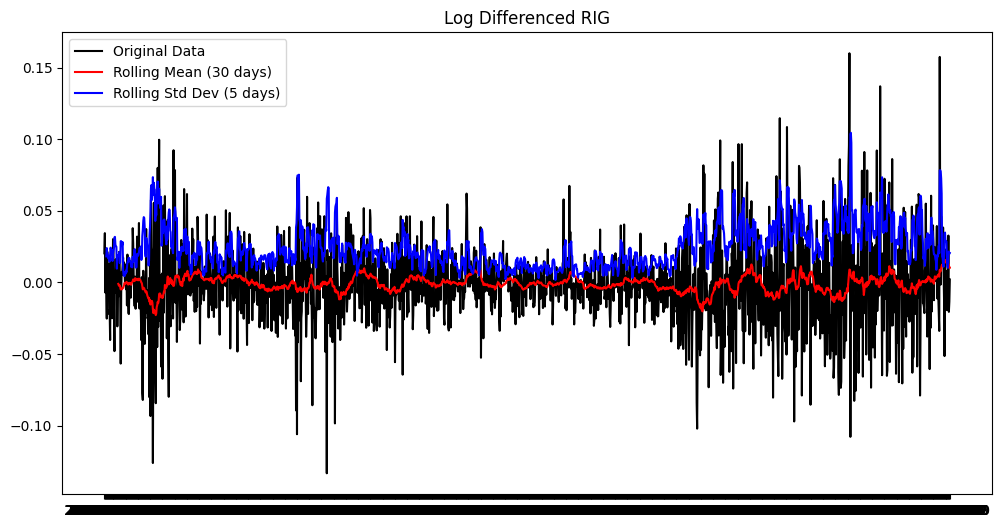

Dickey-Fuller Test: Log Differenced RIG

Test Statistic                  -40.364794
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1760.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1762
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2654.670
Date:                Mon, 20 Nov 2023   AIC                           5313.340
Time:                        11:49:53   BIC                           5324.288
Sample:                             0   HQIC                          5317.386
                               - 1762                                         
Covariance Type:                  opg                                         
                 coef    std err          z   

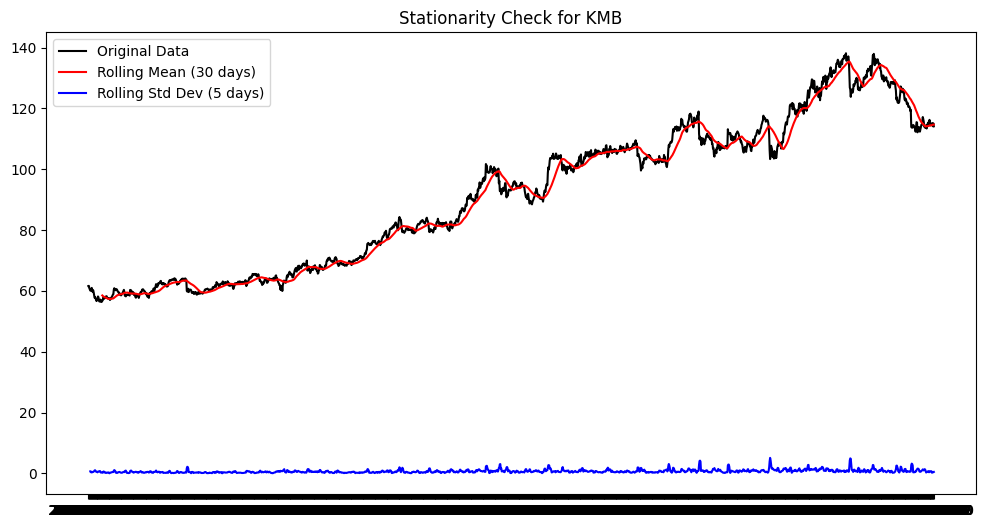

Dickey-Fuller Test: Stationarity Check for KMB

Test Statistic                   -0.995533
p-value                           0.754890
#Lags Used                        1.000000
Number of Observations Used    1760.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764


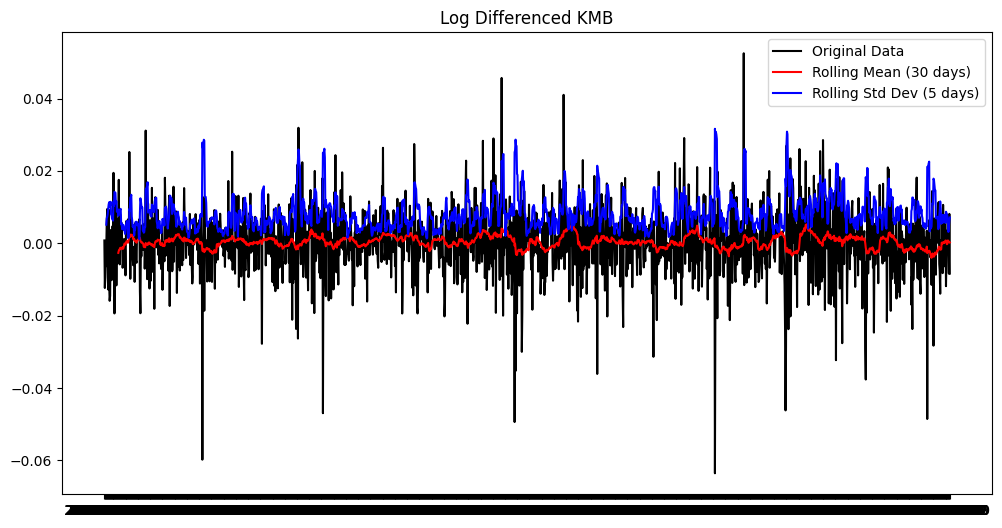

Dickey-Fuller Test: Log Differenced KMB

Test Statistic                  -43.849057
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1760.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1762
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2358.704
Date:                Mon, 20 Nov 2023   AIC                           4721.409
Time:                        11:50:17   BIC                           4732.356
Sample:                             0   HQIC                          4725.454
                               - 1762                                         
Covariance Type:                  opg                                         
                 coef    std err          z   

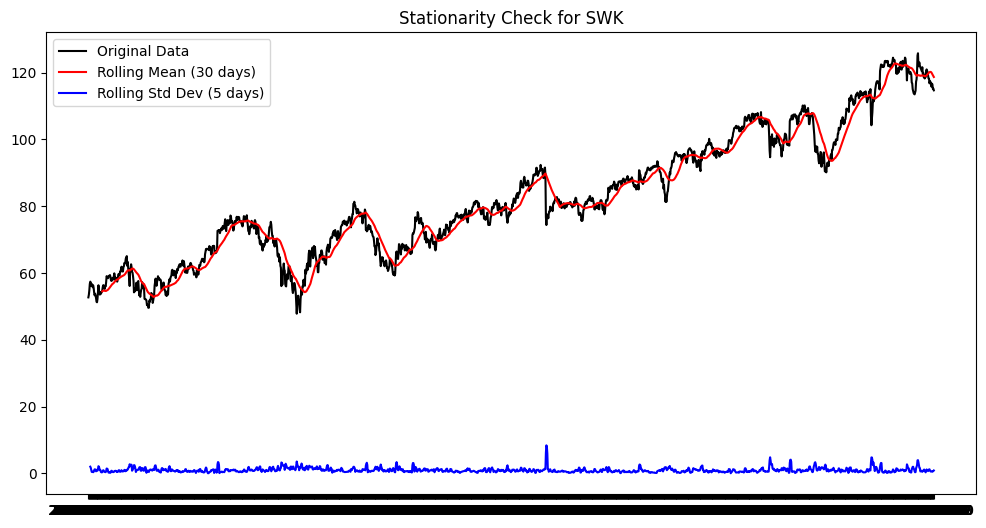

Dickey-Fuller Test: Stationarity Check for SWK

Test Statistic                   -1.011073
p-value                           0.749204
#Lags Used                       10.000000
Number of Observations Used    1751.000000
dtype: float64
Critical value at 1%: -3.43409
Critical value at 5%: -2.86319
Critical value at 10%: -2.56765


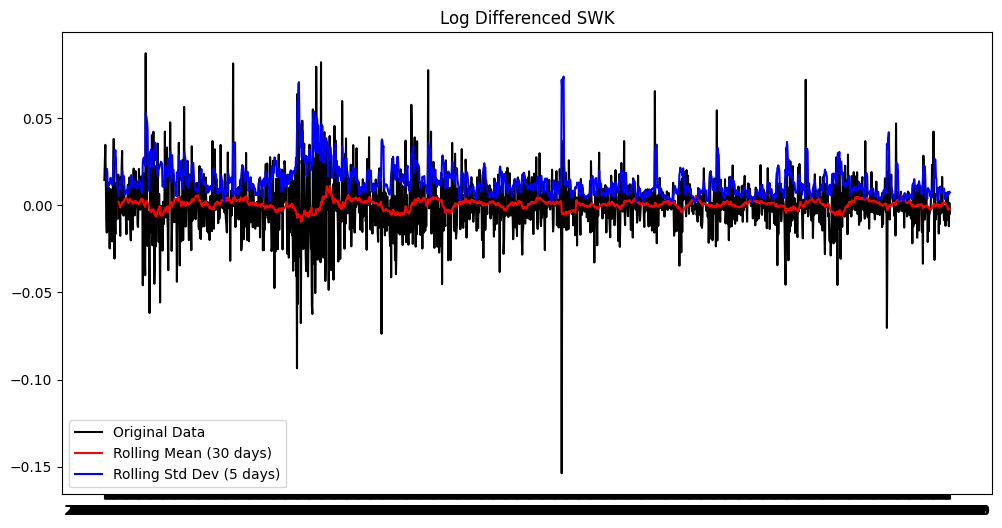

Dickey-Fuller Test: Log Differenced SWK

Test Statistic                  -21.423051
p-value                           0.000000
#Lags Used                        4.000000
Number of Observations Used    1756.000000
dtype: float64
Critical value at 1%: -3.43408
Critical value at 5%: -2.86319
Critical value at 10%: -2.56765
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1762
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2878.928
Date:                Mon, 20 Nov 2023   AIC                           5761.856
Time:                        11:50:45   BIC                           5772.804
Sample:                             0   HQIC                          5765.902
                               - 1762                                         
Covariance Type:                  opg                                         
                 coef    std err          z   

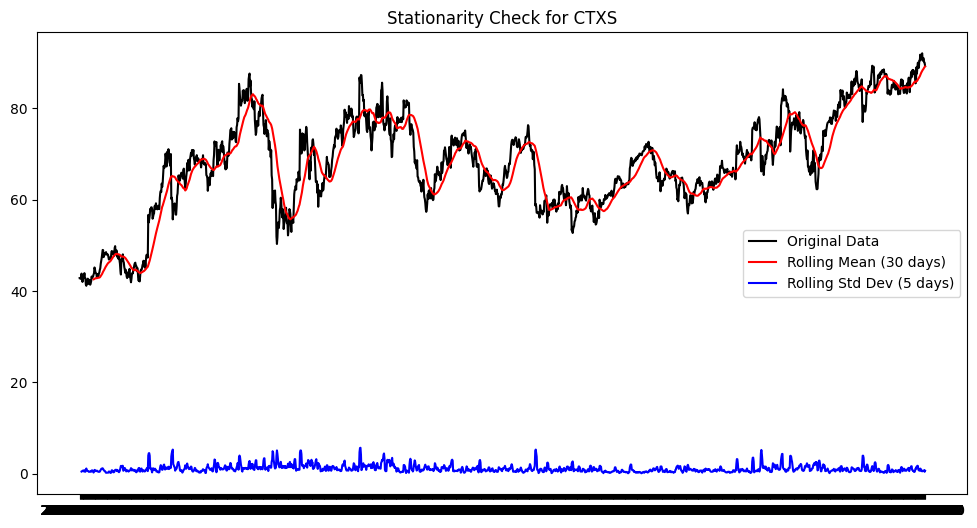

Dickey-Fuller Test: Stationarity Check for CTXS

Test Statistic                   -2.820857
p-value                           0.055356
#Lags Used                        1.000000
Number of Observations Used    1760.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764


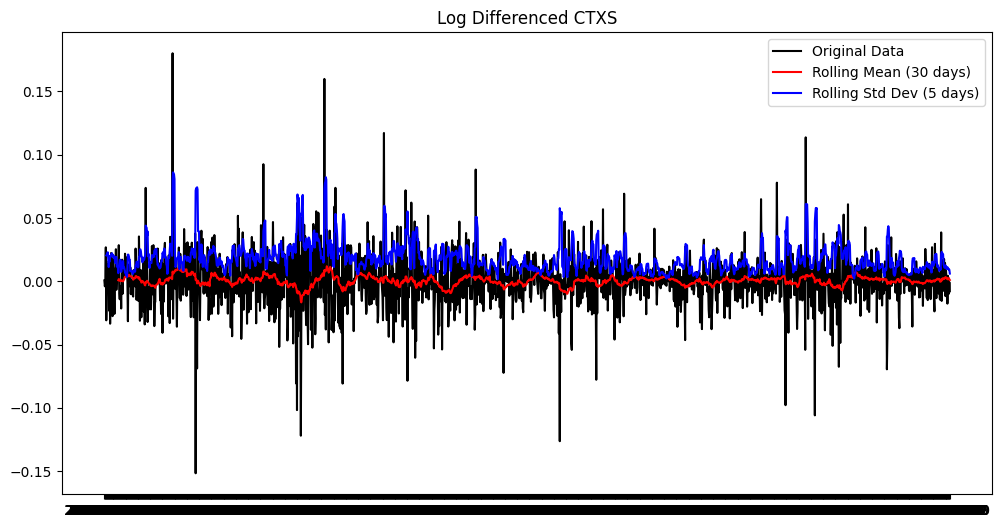

Dickey-Fuller Test: Log Differenced CTXS

Test Statistic                  -44.171316
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1760.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1762
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3143.080
Date:                Mon, 20 Nov 2023   AIC                           6290.160
Time:                        11:51:10   BIC                           6301.107
Sample:                             0   HQIC                          6294.205
                               - 1762                                         
Covariance Type:                  opg                                         
                 coef    std err          z  

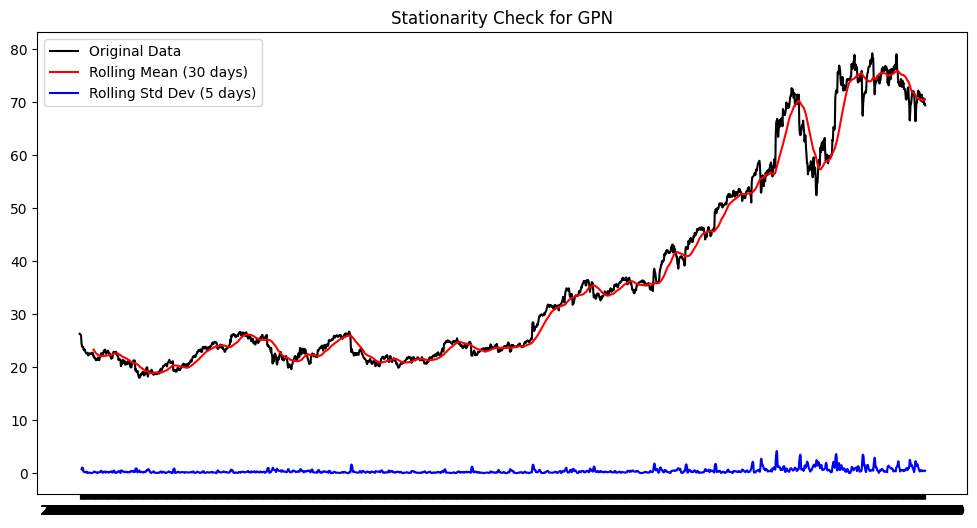

Dickey-Fuller Test: Stationarity Check for GPN

Test Statistic                    0.149012
p-value                           0.969252
#Lags Used                        0.000000
Number of Observations Used    1761.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764


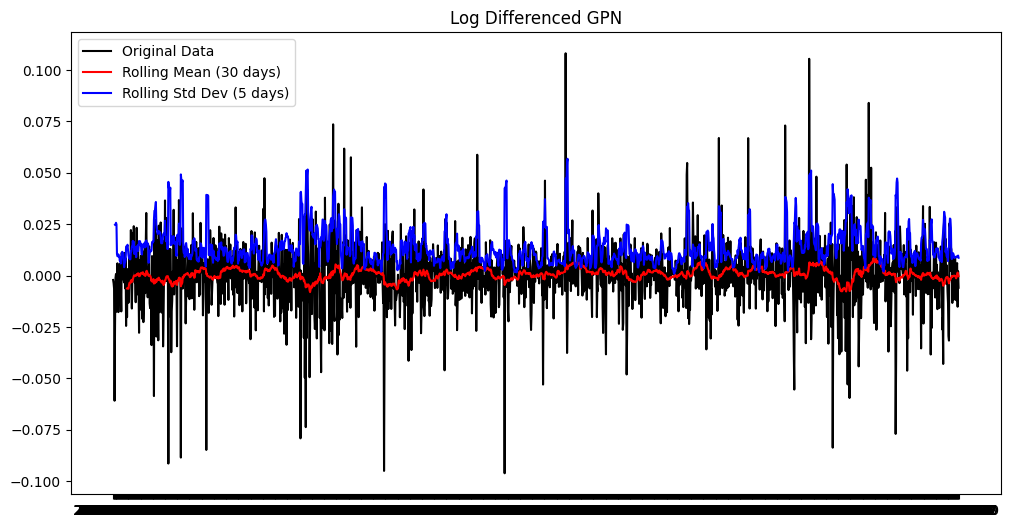

Dickey-Fuller Test: Log Differenced GPN

Test Statistic                  -23.061323
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    1757.000000
dtype: float64
Critical value at 1%: -3.43408
Critical value at 5%: -2.86319
Critical value at 10%: -2.56765
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1762
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1847.873
Date:                Mon, 20 Nov 2023   AIC                           3699.746
Time:                        11:51:32   BIC                           3710.693
Sample:                             0   HQIC                          3703.791
                               - 1762                                         
Covariance Type:                  opg                                         
                 coef    std err          z   

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")  # Ignore convergence warnings for clarity

warnings.filterwarnings("ignore")
def check_stationarity(ts_data, title):
    # Rolling statistics
    roll_mean = ts_data.rolling(30).mean()
    roll_std = ts_data.rolling(5).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(ts_data, color='black', label='Original Data')
    plt.plot(roll_mean, color='red', label='Rolling Mean (30 days)')
    plt.plot(roll_std, color='blue', label='Rolling Std Dev (5 days)')
    plt.legend()
    plt.title(title)
    plt.show()

    # Dickey-Fuller test
    print(f'Dickey-Fuller Test: {title}\n')
    df_test = adfuller(ts_data, autolag='AIC')
    test_result = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    print(test_result)
    for key, value in df_test[4].items():
        print(f'Critical value at {key}: {value:.5f}')
stocks = ['RIG', 'KMB', 'SWK', 'CTXS', 'GPN']

for stock in stocks:
    print(f"\nAnalyzing Stock: {stock}\n{'='*30}")
    stock_data = df[df['symbol'] == stock]['close'].dropna()

    # Checking stationarity
    check_stationarity(stock_data, f'Stationarity Check for {stock}')

    stock_data_log = np.log(stock_data)
    stock_data_log_diff = stock_data_log - stock_data_log.shift()
    stock_data_log_diff.dropna(inplace=True)
    check_stationarity(stock_data_log_diff, f'Log Differenced {stock}')

    # Fit ARIMA Model (example with ARIMA(1,1,0))
    model = ARIMA(stock_data, order=(1, 1, 0))
    model_fit = model.fit()
    print(model_fit.summary())

    # Forecasting (example)
    forecast = model_fit.forecast(steps=5)
    print(f"\nForecast for {stock}: {forecast}\n")


# Build the model using LSTM layers

Processing stock: RIG
Epoch 1/70
7/7 [==============================] - 14s 474ms/step - loss: 0.0077 - val_loss: 8.2333e-04
Epoch 2/70
7/7 [==============================] - 2s 344ms/step - loss: 0.0013 - val_loss: 5.6346e-04
Epoch 3/70
7/7 [==============================] - 4s 573ms/step - loss: 8.6498e-04 - val_loss: 6.9922e-04
Epoch 4/70
7/7 [==============================] - 4s 574ms/step - loss: 7.8290e-04 - val_loss: 5.8421e-04
Epoch 5/70
7/7 [==============================] - 3s 364ms/step - loss: 7.5906e-04 - val_loss: 5.5507e-04
Epoch 6/70
7/7 [==============================] - 2s 344ms/step - loss: 7.0286e-04 - val_loss: 5.7047e-04
Epoch 7/70
7/7 [==============================] - 2s 346ms/step - loss: 7.2269e-04 - val_loss: 5.4120e-04
Epoch 8/70
7/7 [==============================] - 2s 347ms/step - loss: 6.9580e-04 - val_loss: 5.4235e-04
Epoch 9/70
7/7 [==============================] - 3s 497ms/step - loss: 6.9654e-04 - val_loss: 5.4006e-04
Epoch 10/70
7/7 [==============

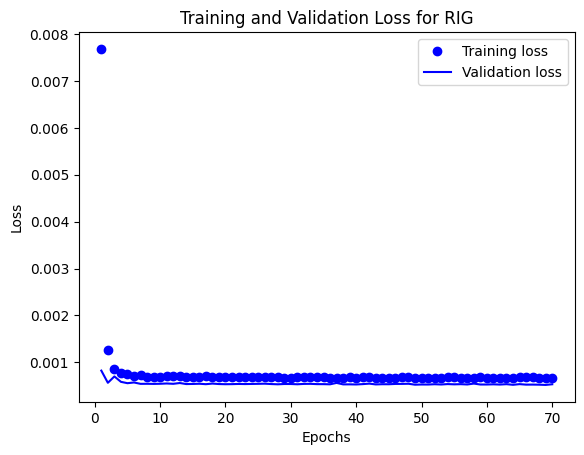

Processing stock: KMB
Epoch 1/70
7/7 [==============================] - 9s 502ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 2/70
7/7 [==============================] - 2s 353ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 3/70
7/7 [==============================] - 2s 342ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 4/70
7/7 [==============================] - 2s 343ms/step - loss: 0.0015 - val_loss: 9.7715e-04
Epoch 5/70
7/7 [==============================] - 4s 567ms/step - loss: 0.0015 - val_loss: 9.0280e-04
Epoch 6/70
7/7 [==============================] - 4s 562ms/step - loss: 0.0015 - val_loss: 8.8438e-04
Epoch 7/70
7/7 [==============================] - 3s 365ms/step - loss: 0.0015 - val_loss: 9.2039e-04
Epoch 8/70
7/7 [==============================] - 2s 336ms/step - loss: 0.0015 - val_loss: 8.9480e-04
Epoch 9/70
7/7 [==============================] - 2s 343ms/step - loss: 0.0015 - val_loss: 8.8833e-04
Epoch 10/70
7/7 [==============================] - 2s 341ms/step - loss:

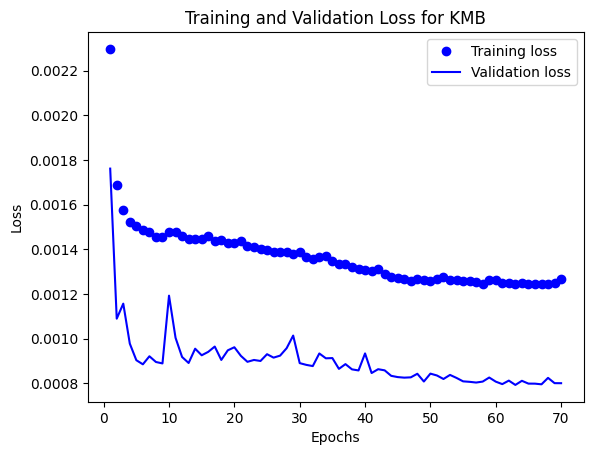

Processing stock: SWK
Epoch 1/70
7/7 [==============================] - 9s 467ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 2/70
7/7 [==============================] - 2s 345ms/step - loss: 0.0011 - val_loss: 9.4981e-04
Epoch 3/70
7/7 [==============================] - 2s 344ms/step - loss: 9.1716e-04 - val_loss: 0.0010
Epoch 4/70
7/7 [==============================] - 2s 347ms/step - loss: 8.5514e-04 - val_loss: 9.2427e-04
Epoch 5/70
7/7 [==============================] - 4s 568ms/step - loss: 8.4733e-04 - val_loss: 9.0774e-04
Epoch 6/70
7/7 [==============================] - 4s 571ms/step - loss: 8.3701e-04 - val_loss: 9.3358e-04
Epoch 7/70
7/7 [==============================] - 2s 343ms/step - loss: 8.2994e-04 - val_loss: 8.7324e-04
Epoch 8/70
7/7 [==============================] - 2s 343ms/step - loss: 8.3262e-04 - val_loss: 9.2511e-04
Epoch 9/70
7/7 [==============================] - 2s 344ms/step - loss: 8.3689e-04 - val_loss: 9.3017e-04
Epoch 10/70
7/7 [=======================

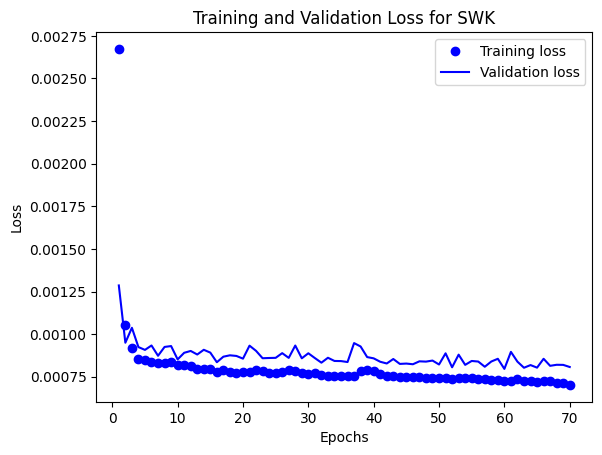

Processing stock: CTXS
Epoch 1/70
7/7 [==============================] - 10s 856ms/step - loss: 0.0097 - val_loss: 0.0022
Epoch 2/70
7/7 [==============================] - 3s 468ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 3/70
7/7 [==============================] - 2s 343ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 4/70
7/7 [==============================] - 2s 346ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/70
7/7 [==============================] - 2s 344ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 6/70
7/7 [==============================] - 3s 404ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 7/70
7/7 [==============================] - 4s 586ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/70
7/7 [==============================] - 4s 528ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/70
7/7 [==============================] - 2s 346ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 10/70
7/7 [==============================] - 2s 343ms/step - loss: 0.0018 - val_loss: 0.

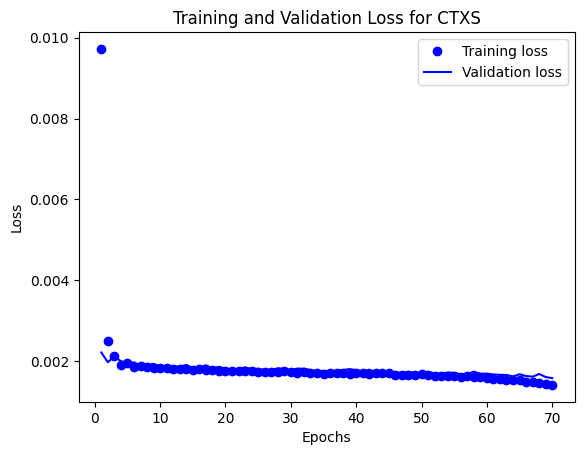

Processing stock: GPN
Epoch 1/70
7/7 [==============================] - 7s 471ms/step - loss: 3.5653e-04 - val_loss: 2.8839e-04
Epoch 2/70
7/7 [==============================] - 3s 474ms/step - loss: 2.0330e-04 - val_loss: 2.0000e-04
Epoch 3/70
7/7 [==============================] - 4s 573ms/step - loss: 1.8370e-04 - val_loss: 2.2534e-04
Epoch 4/70
7/7 [==============================] - 3s 466ms/step - loss: 1.7491e-04 - val_loss: 1.9746e-04
Epoch 5/70
7/7 [==============================] - 2s 345ms/step - loss: 1.7380e-04 - val_loss: 2.0127e-04
Epoch 6/70
7/7 [==============================] - 2s 343ms/step - loss: 1.7069e-04 - val_loss: 2.1435e-04
Epoch 7/70
7/7 [==============================] - 2s 341ms/step - loss: 1.7248e-04 - val_loss: 1.9160e-04
Epoch 8/70
7/7 [==============================] - 3s 378ms/step - loss: 1.6742e-04 - val_loss: 2.0641e-04
Epoch 9/70
7/7 [==============================] - 4s 554ms/step - loss: 1.6630e-04 - val_loss: 1.9635e-04
Epoch 10/70
7/7 [=======

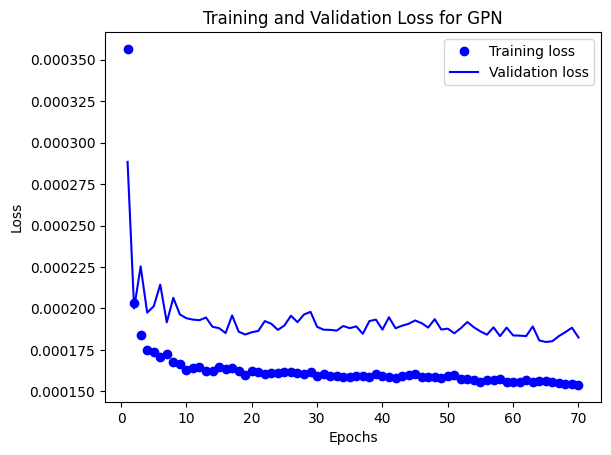

In [28]:
stocks = ['RIG', 'KMB', 'SWK', 'CTXS', 'GPN']
n_epochs = 70  # Adjust as needed
batch_size = 100  # Adjust as needed
n_neurons = 300  # Adjust as needed
n_layers = 2  # Adjust as needed
seq_len = 20  # Adjust as needed
n_inputs = 4  # Number of features, adjust as needed

for stock in stocks:
    print(f"Processing stock: {stock}")

    # Prepare data for the current stock
    df_stock = df[df.symbol == stock].copy()
    df_stock.drop(['symbol'], axis=1, inplace=True)
    df_stock_norm = normalize_data(df_stock)

    # Create train, validation, test data
    x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len, 40, 20, 40)

    # Calculate moving averages for y_train, y_valid, y_test
    y_train_ma = calculate_moving_average(y_train, window_size)
    y_valid_ma = calculate_moving_average(y_valid, window_size)
    y_test_ma = calculate_moving_average(y_test, window_size)

    # Adjust datasets
    y_train_residual = y_train[window_size-1:] - y_train_ma
    y_valid_residual = y_valid[window_size-1:] - y_valid_ma
    y_test_residual = y_test[window_size-1:] - y_test_ma

    x_train_adjusted = x_train[-y_train_residual.shape[0]:, :, :]
    x_valid_adjusted = x_valid[-y_valid_residual.shape[0]:, :, :]
    x_test_adjusted = x_test[-y_test_residual.shape[0]:, :, :]

    # Build and compile the LSTM model
    model_LSTM = tf.keras.Sequential()
    for i in range(n_layers - 1):
        model_LSTM.add(tf.keras.layers.LSTM(n_neurons, return_sequences=True, activation='tanh', recurrent_activation='sigmoid'))
    model_LSTM.add(tf.keras.layers.LSTM(n_neurons, return_sequences=False, activation='tanh', recurrent_activation='sigmoid'))
    model_LSTM.add(tf.keras.layers.Dense(5))  # Assuming 5 output features

    model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history_LSTM = model_LSTM.fit(
        x_train_adjusted, y_train_residual,
        epochs=n_epochs,
        batch_size=batch_size,
        validation_data=(x_valid_adjusted, y_valid_residual)
    )

    # Make predictions
    y_train_pred_residual_LSTM = model_LSTM.predict(x_train_adjusted)
    y_valid_pred_residual_LSTM = model_LSTM.predict(x_valid_adjusted)
    y_test_pred_residual_LSTM = model_LSTM.predict(x_test_adjusted)

    # Calculate final predictions
    y_train_final_pred_LSTM = y_train_ma + y_train_pred_residual_LSTM[:y_train_ma.shape[0], :]
    y_valid_final_pred_LSTM = y_valid_ma + y_valid_pred_residual_LSTM[:y_valid_ma.shape[0], :]
    y_test_final_pred_LSTM = y_test_ma + y_test_pred_residual_LSTM[:y_test_ma.shape[0], :]

    # Plot training and validation loss
    loss = history_LSTM.history['loss']
    val_loss = history_LSTM.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Training on stock: RIG
Epoch 1/70
7/7 [==============================] - 10s 836ms/step - loss: 0.0077 - val_loss: 8.0743e-04
Epoch 2/70
7/7 [==============================] - 7s 1s/step - loss: 0.0010 - val_loss: 8.7140e-04
Epoch 3/70
7/7 [==============================] - 4s 557ms/step - loss: 8.9159e-04 - val_loss: 5.6529e-04
Epoch 4/70
7/7 [==============================] - 4s 554ms/step - loss: 7.9191e-04 - val_loss: 5.8638e-04
Epoch 5/70
7/7 [==============================] - 5s 759ms/step - loss: 7.1858e-04 - val_loss: 5.8235e-04
Epoch 6/70
7/7 [==============================] - 6s 861ms/step - loss: 7.1350e-04 - val_loss: 5.5775e-04
Epoch 7/70
7/7 [==============================] - 4s 562ms/step - loss: 7.0559e-04 - val_loss: 5.4437e-04
Epoch 8/70
7/7 [==============================] - 4s 555ms/step - loss: 6.9701e-04 - val_loss: 5.4876e-04
Epoch 9/70
7/7 [==============================] - 5s 791ms/step - loss: 6.9857e-04 - val_loss: 5.5426e-04
Epoch 10/70
7/7 [================

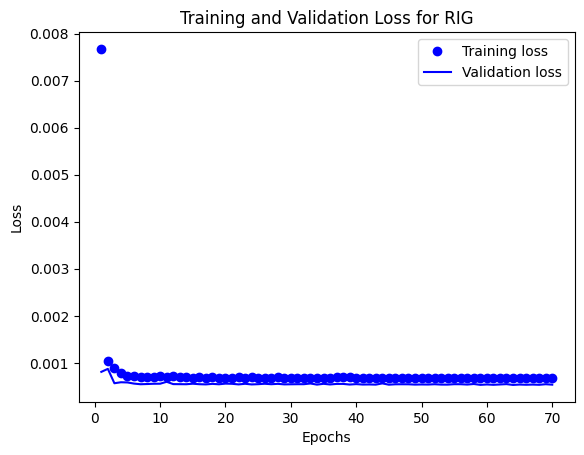

Training on stock: KMB
Epoch 1/70
7/7 [==============================] - 38s 740ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 2/70
7/7 [==============================] - 6s 935ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 3/70
7/7 [==============================] - 5s 661ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/70
7/7 [==============================] - 4s 556ms/step - loss: 0.0016 - val_loss: 9.4943e-04
Epoch 5/70
7/7 [==============================] - 5s 678ms/step - loss: 0.0016 - val_loss: 9.4070e-04
Epoch 6/70
7/7 [==============================] - 7s 992ms/step - loss: 0.0016 - val_loss: 9.0348e-04
Epoch 7/70
7/7 [==============================] - 4s 557ms/step - loss: 0.0015 - val_loss: 8.9087e-04
Epoch 8/70
7/7 [==============================] - 4s 563ms/step - loss: 0.0015 - val_loss: 8.8030e-04
Epoch 9/70
7/7 [==============================] - 5s 737ms/step - loss: 0.0015 - val_loss: 9.0033e-04
Epoch 10/70
7/7 [==============================] - 6s 876ms/step - los

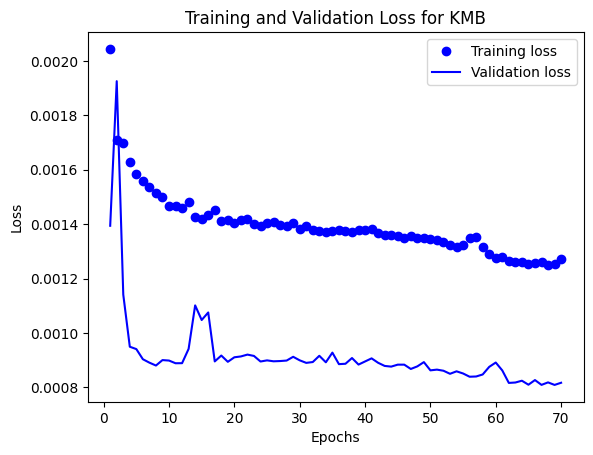

Training on stock: SWK
Epoch 1/70
7/7 [==============================] - 12s 735ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 2/70
7/7 [==============================] - 4s 556ms/step - loss: 9.2828e-04 - val_loss: 0.0010
Epoch 3/70
7/7 [==============================] - 5s 787ms/step - loss: 8.8079e-04 - val_loss: 9.8440e-04
Epoch 4/70
7/7 [==============================] - 6s 828ms/step - loss: 8.5151e-04 - val_loss: 9.1723e-04
Epoch 5/70
7/7 [==============================] - 4s 558ms/step - loss: 8.4789e-04 - val_loss: 9.6673e-04
Epoch 6/70
7/7 [==============================] - 4s 562ms/step - loss: 8.4333e-04 - val_loss: 9.0843e-04
Epoch 7/70
7/7 [==============================] - 5s 824ms/step - loss: 8.3433e-04 - val_loss: 9.1134e-04
Epoch 8/70
7/7 [==============================] - 5s 777ms/step - loss: 8.2447e-04 - val_loss: 8.8683e-04
Epoch 9/70
7/7 [==============================] - 4s 559ms/step - loss: 8.2500e-04 - val_loss: 9.1457e-04
Epoch 10/70
7/7 [=================

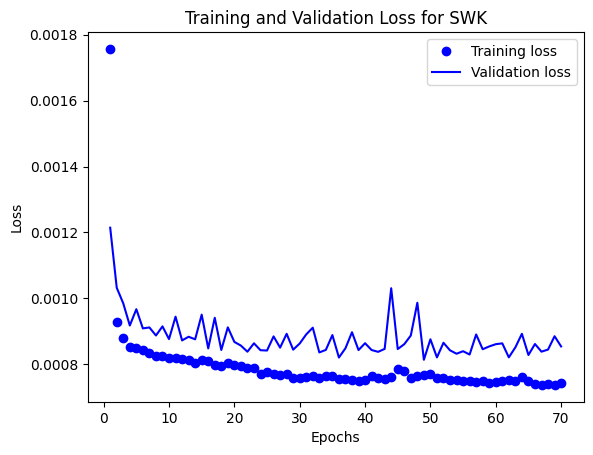

Training on stock: CTXS
Epoch 1/70
7/7 [==============================] - 11s 727ms/step - loss: 0.0066 - val_loss: 0.0022
Epoch 2/70
7/7 [==============================] - 4s 601ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 3/70
7/7 [==============================] - 7s 987ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4/70
7/7 [==============================] - 4s 554ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/70
7/7 [==============================] - 4s 558ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 6/70
7/7 [==============================] - 4s 671ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/70
7/7 [==============================] - 7s 986ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/70
7/7 [==============================] - 4s 554ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/70
7/7 [==============================] - 4s 561ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 10/70
7/7 [==============================] - 5s 756ms/step - loss: 0.0019 - val_loss: 0

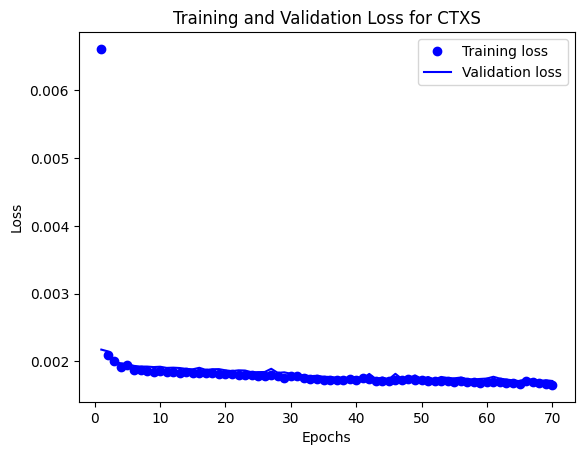

Training on stock: GPN
Epoch 1/70
7/7 [==============================] - 13s 815ms/step - loss: 3.1438e-04 - val_loss: 3.7370e-04
Epoch 2/70
7/7 [==============================] - 4s 566ms/step - loss: 2.1271e-04 - val_loss: 2.2207e-04
Epoch 3/70
7/7 [==============================] - 5s 768ms/step - loss: 1.8348e-04 - val_loss: 2.2316e-04
Epoch 4/70
7/7 [==============================] - 6s 871ms/step - loss: 1.7587e-04 - val_loss: 2.0102e-04
Epoch 5/70
7/7 [==============================] - 4s 566ms/step - loss: 1.7877e-04 - val_loss: 2.0020e-04
Epoch 6/70
7/7 [==============================] - 4s 560ms/step - loss: 1.7698e-04 - val_loss: 2.0598e-04
Epoch 7/70
7/7 [==============================] - 6s 887ms/step - loss: 1.7669e-04 - val_loss: 2.0429e-04
Epoch 8/70
7/7 [==============================] - 5s 741ms/step - loss: 1.7681e-04 - val_loss: 2.0946e-04
Epoch 9/70
7/7 [==============================] - 4s 565ms/step - loss: 1.7636e-04 - val_loss: 2.0703e-04
Epoch 10/70
7/7 [=====

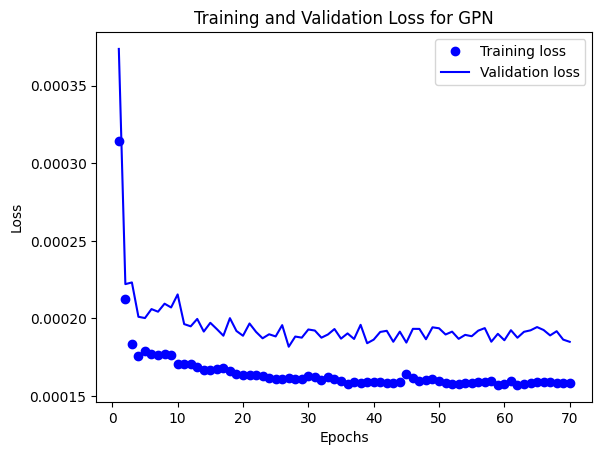

In [37]:
stocks = ['RIG', 'KMB', 'SWK', 'CTXS', 'GPN']
n_epochs = 70  # Adjust as needed
batch_size = 100  # Adjust as needed
n_neurons = 300  # Number of neurons in LSTM layers
n_inputs = 5    # Number of features; adjust as needed
n_outputs = 5   # Assuming 5 output features
seq_len = 20    # Sequence length for your LSTM model

for stock in stocks:
    print(f"Training on stock: {stock}")

    # Filter the DataFrame for the current stock
    df_stock = df[df['symbol'] == stock].copy()
    df_stock.drop(['symbol'], axis=1, inplace=True)
    df_stock_norm = normalize_data(df_stock)

    # Create train, validation, test data
    x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len, 40, 20, 40)

    # Calculate moving averages for y_train, y_valid, y_test
    y_train_ma = calculate_moving_average(y_train, window_size)
    y_valid_ma = calculate_moving_average(y_valid, window_size)
    y_test_ma = calculate_moving_average(y_test, window_size)

    # Adjust datasets
    y_train_adjusted = y_train[window_size-1:] - y_train_ma
    y_valid_adjusted = y_valid[window_size-1:] - y_valid_ma
    y_test_adjusted = y_test[window_size-1:] - y_test_ma

    x_train_adjusted = x_train[-y_train_adjusted.shape[0]:, :, :]
    x_valid_adjusted = x_valid[-y_valid_adjusted.shape[0]:, :, :]
    x_test_adjusted = x_test[-y_test_adjusted.shape[0]:, :, :]

    # Define the LSTM model
    model_LSTM = tf.keras.Sequential([
        tf.keras.layers.LSTM(n_neurons, return_sequences=True, input_shape=(x_train_adjusted.shape[1], n_inputs)),
        tf.keras.layers.LSTM(n_neurons, return_sequences=True),
        tf.keras.layers.LSTM(n_neurons, return_sequences=False),
        tf.keras.layers.Dense(5)
    ])

    # Compile the model
    model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history_LSTM = model_LSTM.fit(
        x_train_adjusted, y_train_adjusted,
        epochs=n_epochs,
        batch_size=batch_size,
        validation_data=(x_valid_adjusted, y_valid_adjusted)
    )

    # Make predictions
    y_train_pred_LSTM = model_LSTM.predict(x_train_adjusted)
    y_valid_pred_LSTM = model_LSTM.predict(x_valid_adjusted)
    y_test_pred_LSTM = model_LSTM.predict(x_test_adjusted)

    # Calculate final predictions
    y_train_final_pred_LSTM = y_train_ma + y_train_pred_LSTM[-y_train_ma.shape[0]:]
    y_valid_final_pred_LSTM = y_valid_ma + y_valid_pred_LSTM[-y_valid_ma.shape[0]:]
    y_test_final_pred_LSTM = y_test_ma + y_test_pred_LSTM[-y_test_ma.shape[0]:]

    # Plot training and validation loss
    loss = history_LSTM.history['loss']
    val_loss = history_LSTM.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# use GRU cell

Training on stock: RIG
Epoch 1/70
7/7 [==============================] - 8s 391ms/step - loss: 0.0139 - val_loss: 0.0012
Epoch 2/70
7/7 [==============================] - 2s 270ms/step - loss: 0.0026 - val_loss: 8.7124e-04
Epoch 3/70
7/7 [==============================] - 2s 273ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/70
7/7 [==============================] - 2s 272ms/step - loss: 9.2002e-04 - val_loss: 6.5310e-04
Epoch 5/70
7/7 [==============================] - 2s 359ms/step - loss: 8.9631e-04 - val_loss: 5.8139e-04
Epoch 6/70
7/7 [==============================] - 3s 456ms/step - loss: 7.0841e-04 - val_loss: 5.9015e-04
Epoch 7/70
7/7 [==============================] - 3s 463ms/step - loss: 7.3608e-04 - val_loss: 5.4120e-04
Epoch 8/70
7/7 [==============================] - 2s 284ms/step - loss: 6.9696e-04 - val_loss: 5.8092e-04
Epoch 9/70
7/7 [==============================] - 2s 275ms/step - loss: 6.9256e-04 - val_loss: 5.4257e-04
Epoch 10/70
7/7 [==========================

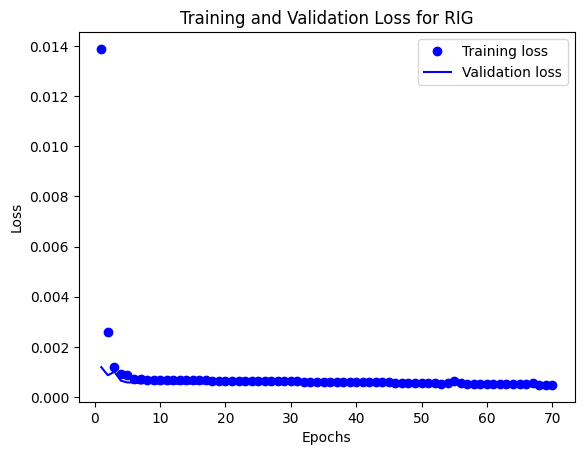

Training on stock: KMB
Epoch 1/70
7/7 [==============================] - 8s 393ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 2/70
7/7 [==============================] - 2s 273ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3/70
7/7 [==============================] - 2s 268ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 4/70
7/7 [==============================] - 2s 270ms/step - loss: 0.0015 - val_loss: 9.1665e-04
Epoch 5/70
7/7 [==============================] - 3s 414ms/step - loss: 0.0015 - val_loss: 9.2736e-04
Epoch 6/70
7/7 [==============================] - 3s 478ms/step - loss: 0.0014 - val_loss: 8.8879e-04
Epoch 7/70
7/7 [==============================] - 3s 429ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/70
7/7 [==============================] - 2s 270ms/step - loss: 0.0014 - val_loss: 9.4957e-04
Epoch 9/70
7/7 [==============================] - 2s 267ms/step - loss: 0.0014 - val_loss: 8.8494e-04
Epoch 10/70
7/7 [==============================] - 2s 272ms/step - loss: 0.

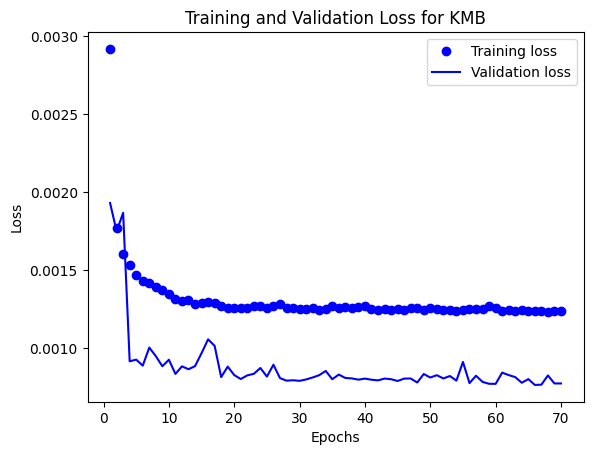

Training on stock: SWK
Epoch 1/70
7/7 [==============================] - 6s 388ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 2/70
7/7 [==============================] - 3s 462ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/70
7/7 [==============================] - 3s 451ms/step - loss: 9.2387e-04 - val_loss: 0.0011
Epoch 4/70
7/7 [==============================] - 3s 410ms/step - loss: 8.4506e-04 - val_loss: 0.0010
Epoch 5/70
7/7 [==============================] - 2s 269ms/step - loss: 8.2865e-04 - val_loss: 8.8609e-04
Epoch 6/70
7/7 [==============================] - 2s 270ms/step - loss: 7.8999e-04 - val_loss: 8.3528e-04
Epoch 7/70
7/7 [==============================] - 2s 268ms/step - loss: 7.7851e-04 - val_loss: 8.6535e-04
Epoch 8/70
7/7 [==============================] - 2s 271ms/step - loss: 7.7650e-04 - val_loss: 8.3173e-04
Epoch 9/70
7/7 [==============================] - 2s 273ms/step - loss: 7.6402e-04 - val_loss: 8.1519e-04
Epoch 10/70
7/7 [==============================

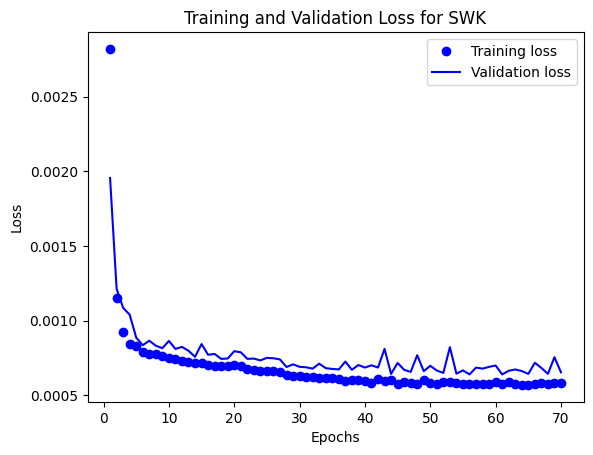

Training on stock: CTXS
Epoch 1/70
7/7 [==============================] - 8s 601ms/step - loss: 0.0104 - val_loss: 0.0028
Epoch 2/70
7/7 [==============================] - 3s 444ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 3/70
7/7 [==============================] - 2s 347ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 4/70
7/7 [==============================] - 2s 269ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 5/70
7/7 [==============================] - 2s 276ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 6/70
7/7 [==============================] - 2s 269ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 7/70
7/7 [==============================] - 2s 271ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 8/70
7/7 [==============================] - 2s 288ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 9/70
7/7 [==============================] - 3s 454ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 10/70
7/7 [==============================] - 3s 449ms/step - loss: 0.0017 - val_loss: 0.

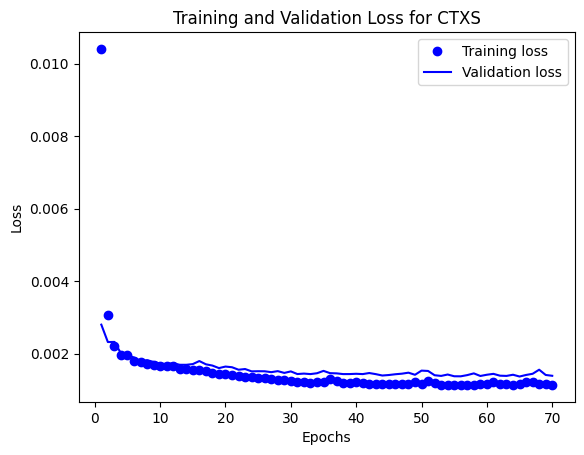

Training on stock: GPN
Epoch 1/70
7/7 [==============================] - 9s 592ms/step - loss: 5.7661e-04 - val_loss: 1.9865e-04
Epoch 2/70
7/7 [==============================] - 2s 271ms/step - loss: 2.4299e-04 - val_loss: 2.0110e-04
Epoch 3/70
7/7 [==============================] - 2s 270ms/step - loss: 1.9852e-04 - val_loss: 2.1336e-04
Epoch 4/70
7/7 [==============================] - 2s 277ms/step - loss: 1.8077e-04 - val_loss: 2.4361e-04
Epoch 5/70
7/7 [==============================] - 2s 273ms/step - loss: 1.6498e-04 - val_loss: 2.0014e-04
Epoch 6/70
7/7 [==============================] - 2s 275ms/step - loss: 1.6907e-04 - val_loss: 2.0913e-04
Epoch 7/70
7/7 [==============================] - 3s 455ms/step - loss: 1.6935e-04 - val_loss: 2.0284e-04
Epoch 8/70
7/7 [==============================] - 3s 453ms/step - loss: 1.6268e-04 - val_loss: 1.9178e-04
Epoch 9/70
7/7 [==============================] - 3s 407ms/step - loss: 1.6051e-04 - val_loss: 1.8663e-04
Epoch 10/70
7/7 [======

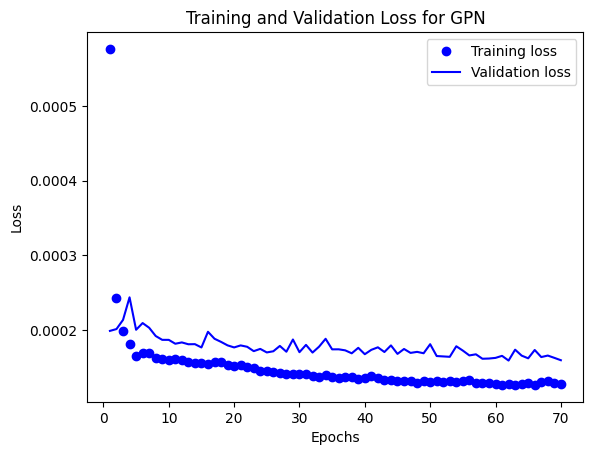

In [38]:
stocks = ['RIG', 'KMB', 'SWK', 'CTXS', 'GPN']
n_epochs = 70  # Adjust as needed
batch_size = 100  # Adjust as needed
n_neurons = 300  # Number of neurons in GRU layers
n_layers = 2     # Number of GRU layers
n_inputs = 4     # Number of features; adjust as needed
n_outputs = 5    # Assuming 5 output features
seq_len = 20     # Sequence length for your GRU model

for stock in stocks:
    print(f"Training on stock: {stock}")

    # Filter the DataFrame for the current stock
    df_stock = df[df['symbol'] == stock].copy()
    df_stock.drop(['symbol'], axis=1, inplace=True)
    df_stock_norm = normalize_data(df_stock)

    # Create train, validation, test data
    x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len, 40, 20, 40)

    # Calculate moving averages for y_train, y_valid, y_test
    y_train_ma = calculate_moving_average(y_train, window_size)
    y_valid_ma = calculate_moving_average(y_valid, window_size)
    y_test_ma = calculate_moving_average(y_test, window_size)

    # Adjust datasets
    y_train_residual = y_train[window_size-1:] - y_train_ma
    y_valid_residual = y_valid[window_size-1:] - y_valid_ma
    y_test_residual = y_test[window_size-1:] - y_test_ma

    x_train_adjusted = x_train[-y_train_residual.shape[0]:, :, :]
    x_valid_adjusted = x_valid[-y_valid_residual.shape[0]:, :, :]
    x_test_adjusted = x_test[-y_test_residual.shape[0]:, :, :]

    # Define the GRU model
    model_GRU = tf.keras.Sequential()
    for _ in range(n_layers - 1):
        model_GRU.add(tf.keras.layers.GRU(n_neurons, return_sequences=True, activation='tanh'))
    model_GRU.add(tf.keras.layers.GRU(n_neurons, activation='tanh'))  # Last layer does not return sequences
    model_GRU.add(tf.keras.layers.Dense(n_outputs))

    # Compile the model
    model_GRU.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history_GRU = model_GRU.fit(
        x_train_adjusted, y_train_residual,
        epochs=n_epochs,
        batch_size=batch_size,
        validation_data=(x_valid_adjusted, y_valid_residual)
    )

    # Make predictions
    y_train_pred_residual_GRU = model_GRU.predict(x_train_adjusted)
    y_valid_pred_residual_GRU = model_GRU.predict(x_valid_adjusted)
    y_test_pred_residual_GRU = model_GRU.predict(x_test_adjusted)

    # Calculate final predictions
    y_train_final_pred_GRU = y_train_ma + y_train_pred_residual_GRU
    y_valid_final_pred_GRU = y_valid_ma + y_valid_pred_residual_GRU
    y_test_final_pred_GRU = y_test_ma + y_test_pred_residual_GRU

    # Plot training and validation loss
    loss = history_GRU.history['loss']
    val_loss = history_GRU.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# 5. Predictions <a class="anchor" id="5-bullet"></a>

In [39]:
y_train.shape

(697, 5)

22/22 [==============================] - 1s 40ms/step


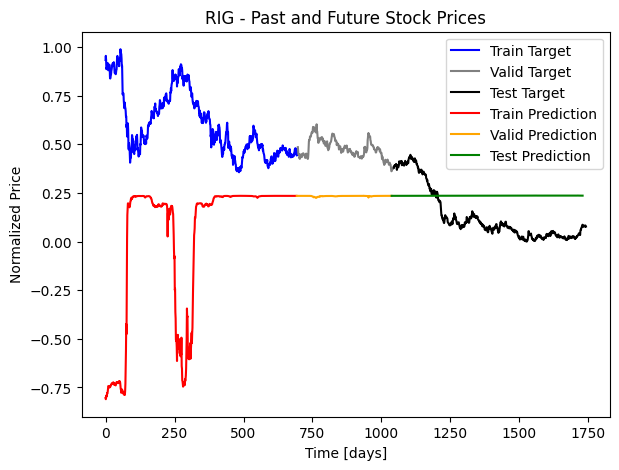

RIG - Correct sign prediction for close - open price for train/valid/test: 0.27/0.15/0.62
22/22 [==============================] - 1s 24ms/step


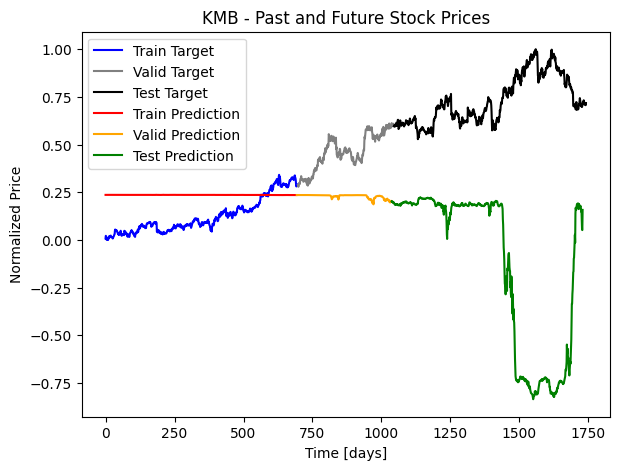

KMB - Correct sign prediction for close - open price for train/valid/test: 0.35/0.33/0.36
22/22 [==============================] - 0s 15ms/step


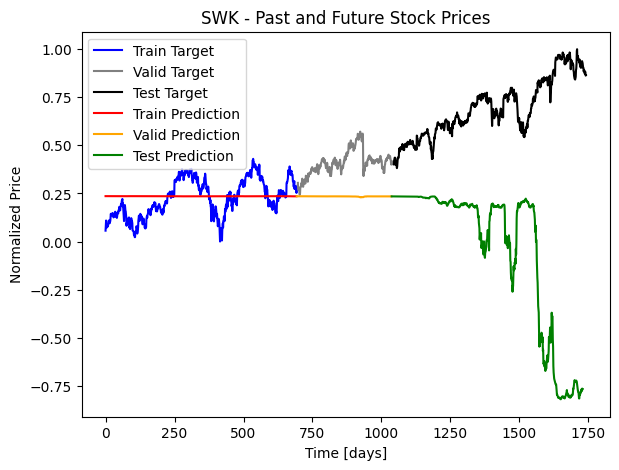

SWK - Correct sign prediction for close - open price for train/valid/test: 0.54/0.48/0.41
22/22 [==============================] - 0s 14ms/step


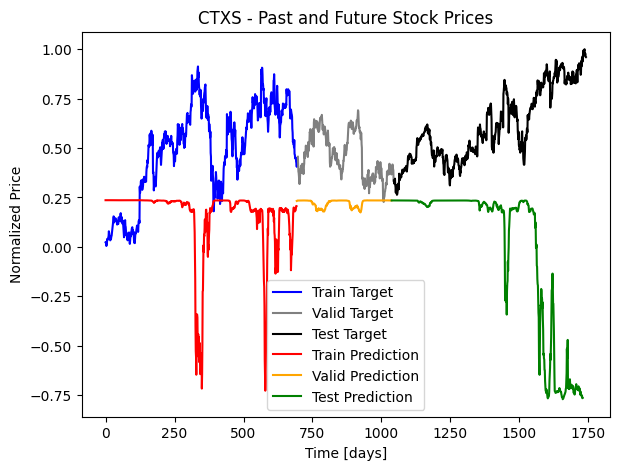

CTXS - Correct sign prediction for close - open price for train/valid/test: 0.59/0.59/0.54
22/22 [==============================] - 0s 15ms/step


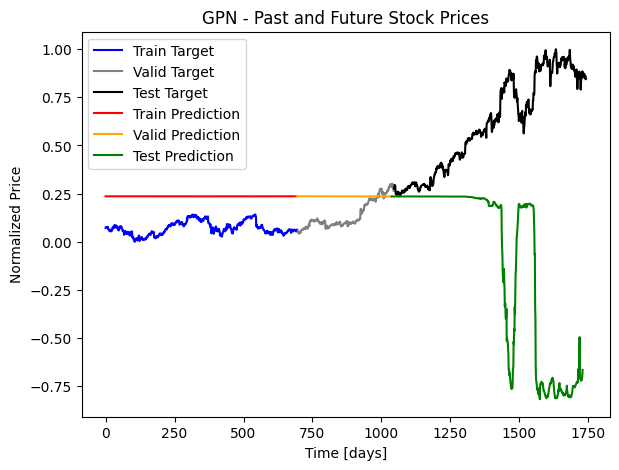

GPN - Correct sign prediction for close - open price for train/valid/test: 0.89/0.87/0.52


In [41]:
stocks = ['RIG', 'KMB', 'SWK', 'CTXS', 'GPN']
seq_len = 20  # Assuming this is your sequence length
window_size = 5  # Assuming this is your window size for moving averages

for stock in stocks:
    # Filter and normalize the data for the current stock
    df_stock = df[df['symbol'] == stock].copy()
    df_stock.drop(['symbol'], axis=1, inplace=True)
    df_stock_norm = normalize_data(df_stock)

    # Create train, validation, test data
    x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len, 40, 20, 40)

    # Calculate moving averages for y_train, y_valid, y_test
    y_train_ma = calculate_moving_average(y_train, window_size)
    y_valid_ma = calculate_moving_average(y_valid, window_size)
    y_test_ma = calculate_moving_average(y_test, window_size)

    # Adjust datasets
    y_train_residual = y_train[window_size-1:] - y_train_ma
    y_valid_residual = y_valid[window_size-1:] - y_valid_ma
    y_test_residual = y_test[window_size-1:] - y_test_ma

    x_train_adjusted = x_train[-y_train_residual.shape[0]:, :, :]
    x_valid_adjusted = x_valid[-y_valid_residual.shape[0]:, :, :]
    x_test_adjusted = x_test[-y_test_residual.shape[0]:, :, :]

    # Assuming you have a model for each stock and it's already trained
    # For example: model = your_model_for_stock(stock)
    # Here, replace with your model prediction logic
    y_train_final_pred = model.predict(x_train_adjusted)
    y_valid_final_pred = model.predict(x_valid_adjusted)
    y_test_final_pred = model.predict(x_test_adjusted)

    # Plotting predictions and actual values
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)

    ft = 1  # Assuming '1' is for 'close' prices
    plt.plot(np.arange(y_train.shape[0]), y_train[:, ft], color='blue', label='Train Target')
    plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:, ft], color='gray', label='Valid Target')
    plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0], y_train.shape[0]+y_valid.shape[0]+y_test.shape[0]), y_test[:, ft], color='black', label='Test Target')
    plt.plot(np.arange(y_train_final_pred.shape[0]), y_train_final_pred[:, ft], color='red', label='Train Prediction')
    plt.plot(np.arange(y_train_final_pred.shape[0], y_train_final_pred.shape[0]+y_valid_final_pred.shape[0]), y_valid_final_pred[:, ft], color='orange', label='Valid Prediction')
    plt.plot(np.arange(y_train_final_pred.shape[0]+y_valid_final_pred.shape[0], y_train_final_pred.shape[0]+y_valid_final_pred.shape[0]+y_test_final_pred.shape[0]), y_test_final_pred[:, ft], color='green', label='Test Prediction')

    plt.title(f'{stock} - Past and Future Stock Prices')
    plt.xlabel('Time [days]')
    plt.ylabel('Normalized Price')
    plt.legend(loc='best')
    plt.show()

    # Calculating Directional Accuracy
    y_train_adjusted = y_train[-y_train_final_pred.shape[0]:]
    y_valid_adjusted = y_valid[-y_valid_final_pred.shape[0]:]
    y_test_adjusted = y_test[-y_test_final_pred.shape[0]:]

    corr_price_development_train = np.sum(np.equal(np.sign(y_train_adjusted[:, 1] - y_train_adjusted[:, 0]), np.sign(y_train_final_pred[:, 1] - y_train_final_pred[:, 0])).astype(int)) / y_train_adjusted.shape[0]
    corr_price_development_valid = np.sum(np.equal(np.sign(y_valid_adjusted[:, 1] - y_valid_adjusted[:, 0]), np.sign(y_valid_final_pred[:, 1] - y_valid_final_pred[:, 0])).astype(int)) / y_valid_adjusted.shape[0]
    corr_price_development_test = np.sum(np.equal(np.sign(y_test_adjusted[:, 1] - y_test_adjusted[:, 0]), np.sign(y_test_final_pred[:, 1] - y_test_final_pred[:, 0])).astype(int)) / y_test_adjusted.shape[0]

    print(f'{stock} - Correct sign prediction for close - open price for train/valid/test: {corr_price_development_train:.2f}/{corr_price_development_valid:.2f}/{corr_price_development_test:.2f}')
